<a href="https://colab.research.google.com/github/SonwabileBanca/SonwabileBanca.github.io/blob/main/VectNov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

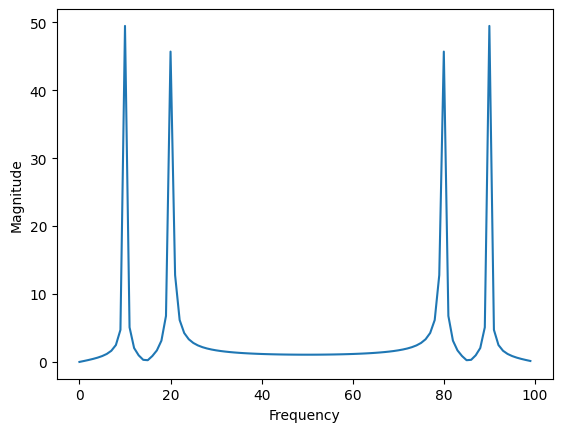

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple signal
time = np.linspace(0, 1, 100)
signal = np.sin(2 * np.pi * 10 * time) + np.sin(2 * np.pi * 20 * time)

# Perform the DFT
fft_result = np.fft.fft(signal)

# Plot the frequency spectrum
plt.plot(np.abs(fft_result))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

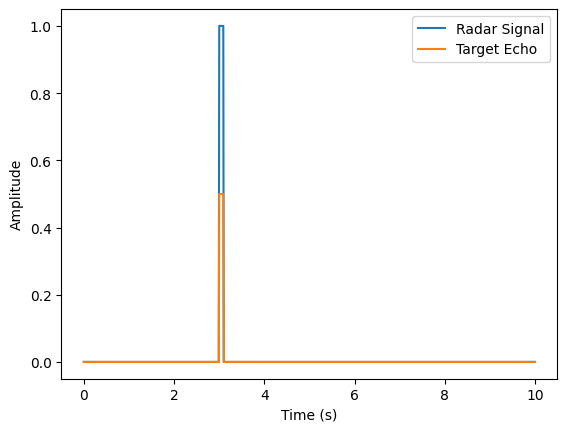

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
c = 3e8  # Speed of light (m/s)
t_max = 10  # Maximum time (s)
dt = 0.01  # Time step (s)
target_distance = 1000  # Distance to target (m)

# Time vector
t = np.arange(0, t_max, dt)

# Simulated radar signal (a simple pulse)
radar_signal = np.zeros_like(t)
pulse_duration = 0.1  # Pulse duration (s)
pulse_start = 3.0  # Start time of the pulse
pulse_end = pulse_start + pulse_duration
radar_signal[int(pulse_start/dt):int(pulse_end/dt)] = 1

# Simulated target echo (delayed and attenuated version of the radar signal)
target_echo = np.zeros_like(t)
echo_delay = 2 * target_distance / c  # Time delay for the echo
echo_start = pulse_start + echo_delay
echo_end = echo_start + pulse_duration
target_echo[int(echo_start/dt):int(echo_end/dt)] = 0.5  # Attenuated echo

# Plot the radar signal and target echo
plt.plot(t, radar_signal, label='Radar Signal')
plt.plot(t, target_echo, label='Target Echo')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

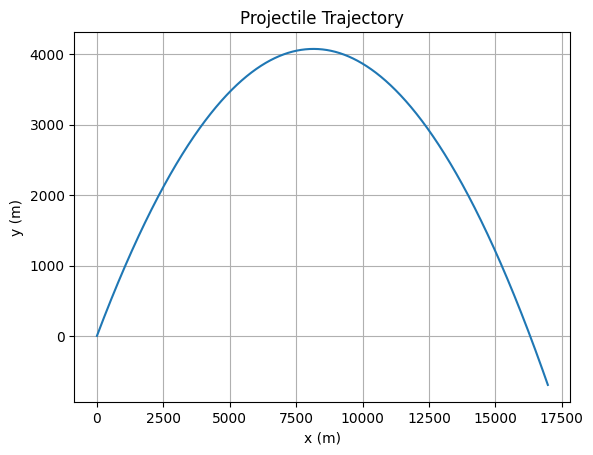

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_projectile(initial_velocity, angle, time_step, total_time):
    """
    Simulates the motion of a projectile using Euler's method.

    Args:
        initial_velocity: Initial velocity of the projectile (m/s)
        angle: Launch angle (degrees)
        time_step: Time step for numerical integration (s)
        total_time: Total simulation time (s)

    Returns:
        A tuple containing time, x-position, y-position, velocity, and acceleration arrays.
    """

    # Convert angle to radians
    theta = np.radians(angle)

    # Initial conditions
    x = 0
    y = 0
    vx = initial_velocity * np.cos(theta)
    vy = initial_velocity * np.sin(theta)
    ax = 0  # Assuming no horizontal acceleration
    ay = -9.81  # Acceleration due to gravity

    # Time steps
    time = np.arange(0, total_time + time_step, time_step)

    # Arrays to store results
    x_values = []
    y_values = []
    vx_values = []
    vy_values = []
    ax_values = []
    ay_values = []

    for t in time:
        # Update velocity
        vx += ax * time_step
        vy += ay * time_step

        # Update position
        x += vx * time_step
        y += vy * time_step

        # Store values
        x_values.append(x)
        y_values.append(y)
        vx_values.append(vx)
        vy_values.append(vy)
        ax_values.append(ax)
        ay_values.append(ay)

    return time, x_values, y_values, vx_values, vy_values, ax_values, ay_values

# Example usage:
initial_velocity = 400  # m/s
angle = 45  # degrees
time_step = 0.01  # s
total_time = 60  # s

time, x, y, vx, vy, ax, ay = simulate_projectile(initial_velocity, angle, time_step, total_time)

# Plot the trajectory
plt.plot(x, y)
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Projectile Trajectory')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Create a DataFrame to store results
data = {
    'Time': time,
    'X': x,
    'Y': y,
    'VX': vx,
    'VY': vy,
    'AX': ax,
    'AY': ay
}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('projectile_data.csv', index=False)

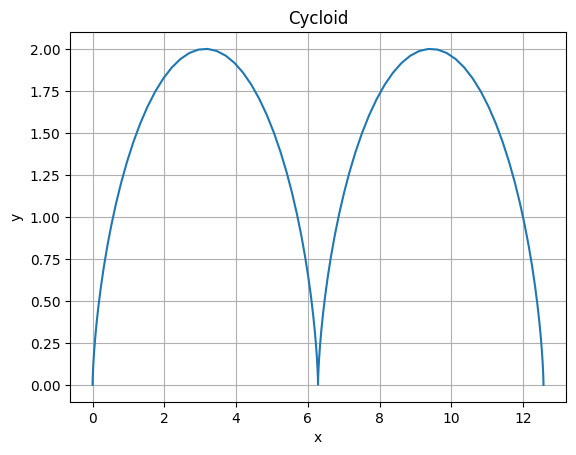

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cycloid(r, t):
    x = r * (t - np.sin(t))
    y = r * (1 - np.cos(t))
    return x, y

# Parameters
r = 1  # Radius of the circle
t = np.linspace(0, 4 * np.pi, 100)  # Parameter range

# Calculate x and y coordinates
x, y = cycloid(r, t)

# Plot the cycloid
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cycloid')
plt.grid(True)
plt.show()

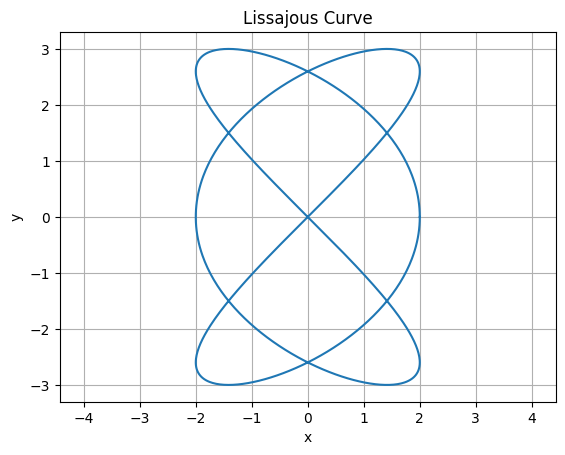

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Lissajous:
    def __init__(self, A, B, a, b, delta):
        self.A = A
        self.B = B
        self.a = a
        self.b = b
        self.delta = delta

    def generate_curve(self):
        t = np.linspace(0, 2*np.pi, 1000)
        x = self.A * np.sin(self.a*t + self.delta)
        y = self.B * np.sin(self.b*t)
        return x, y

# Example usage:
A = 2
B = 3
a = 3
b = 2
delta = np.pi/2

lissajous = Lissajous(A, B, a, b, delta)
x, y = lissajous.generate_curve()

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lissajous Curve')
plt.grid(True)
plt.axis('equal')
plt.show()

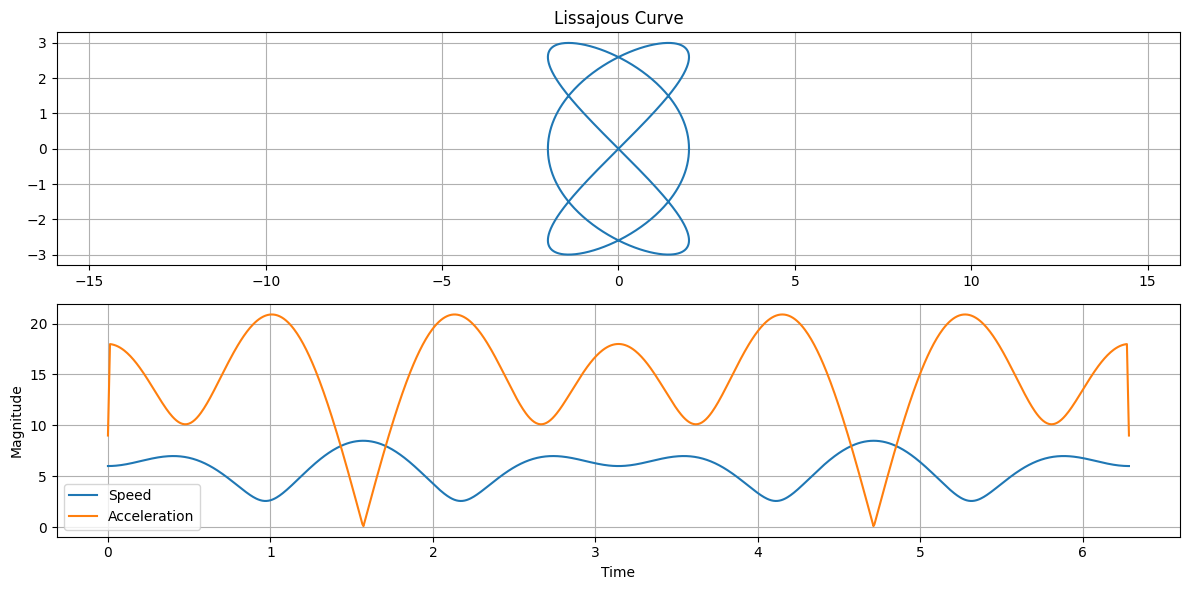

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lissajous_curve(A, B, a, b, delta, t):
    x = A * np.sin(a * t + delta)
    y = B * np.sin(b * t)
    return x, y

# Parameters
A = 2
B = 3
a = 3
b = 2
delta = np.pi / 2
t = np.linspace(0, 2 * np.pi, 1000)

# Generate the curve
x, y = lissajous_curve(A, B, a, b, delta, t)

# Approximate velocity and acceleration
dx_dt = np.gradient(x, t)
dy_dt = np.gradient(y, t)
d2x_dt2 = np.gradient(dx_dt, t)
d2y_dt2 = np.gradient(dy_dt, t)

# Calculate speed and acceleration magnitude
speed = np.sqrt(dx_dt**2 + dy_dt**2)
acceleration = np.sqrt(d2x_dt2**2 + d2y_dt2**2)

# Plot the curve and speed/acceleration
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title('Lissajous Curve')
plt.grid(True)
plt.axis('equal')

plt.subplot(2, 1, 2)
plt.plot(t, speed, label='Speed')
plt.plot(t, acceleration, label='Acceleration')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

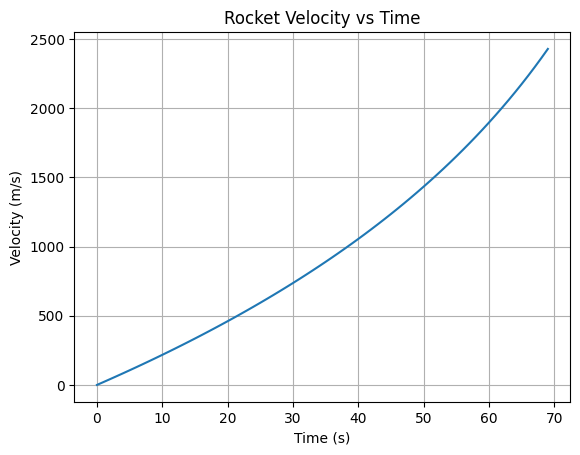

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_mass = 4000  # kg
fuel_mass = 8800  # kg
mass_flow_rate = 129.4  # kg/s
exhaust_velocity = 2050  # m/s
time_step = 1  # s
total_time = fuel_mass / mass_flow_rate  # Total burn time

# Initialize variables
time = 0
mass = initial_mass + fuel_mass
velocity = 0

# Create lists to store time, mass, and velocity
time_list = [time]
mass_list = [mass]
velocity_list = [velocity]

# Euler-Cromer method
while time < total_time:
    # Calculate thrust using the rocket equation
    thrust = mass_flow_rate * exhaust_velocity
    acceleration = thrust / mass
    velocity += acceleration * time_step
    mass -= mass_flow_rate * time_step
    time += time_step


    time_list.append(time)
    mass_list.append(mass)
    velocity_list.append(velocity)

# Convert lists to NumPy arrays for plotting
time_array = np.array(time_list)
mass_array = np.array(mass_list)
velocity_array = np.array(velocity_list)

# Plot the velocity vs time
plt.plot(time_array, velocity_array)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Rocket Velocity vs Time')
plt.grid(True)
plt.show()

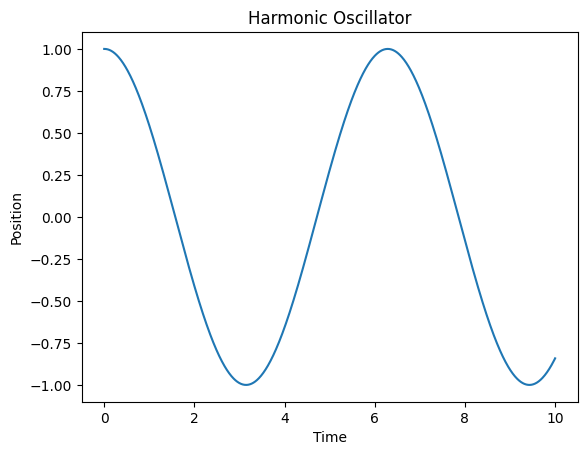

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_oscillator_hamiltonian(x, p, k):
    """Calculates the Hamiltonian for a harmonic oscillator."""
    return 0.5 * p**2 + 0.5 * k * x**2

def hamiltonian_dynamics(x0, p0, k, dt, num_steps):
    """Simulates the dynamics of a harmonic oscillator."""
    x = np.zeros(num_steps + 1)
    p = np.zeros(num_steps + 1)
    t = np.linspace(0, num_steps * dt, num_steps + 1)

    x[0] = x0
    p[0] = p0

    for i in range(num_steps):
        # Verlet integration
        x[i+1] = x[i] + dt * p[i]
        p[i+1] = p[i] - dt * k * x[i+1]

    return t, x, p

# Parameters
k = 1.0  # Spring constant
dt = 0.01  # Time step
num_steps = 1000
x0 = 1.0  # Initial position
p0 = 0.0  # Initial momentum

# Simulate the dynamics
t, x, p = hamiltonian_dynamics(x0, p0, k, dt, num_steps)

# Plot the results
plt.plot(t, x)
plt.xlabel("Time")
plt.ylabel("Position")
plt.title("Harmonic Oscillator")
plt.show()